In [1]:
from utils.datamodule import DataModule
import yaml
from utils.engine import train, test, predict_single_img, _save_train_plot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

/Users/komangwikananda/miniconda3/envs/imageclassification/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("dataset.yaml", 'r') as f:
    dataset_cfg = yaml.safe_load(f)

with open("train.yaml", 'r') as f:
    train_cfg = yaml.safe_load(f)


dm = DataModule(dataset_cfg)
dm.setup(processed=True, skip_large=True)

In [ ]:
model, curves = train(dm)

input shape:  (64, 3, 128, 128)


/Users/komangwikananda/miniconda3/envs/imageclassification/lib/python3.13/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



------------------------------------- Calculate Flops Results -------------------------------------
Notations:
number of parameters (Params), number of multiply-accumulate operations(MACs),
number of floating-point operations (FLOPs), floating-point operations per second (FLOPS),
fwd FLOPs (model forward propagation FLOPs), bwd FLOPs (model backward propagation FLOPs),
default model backpropagation takes 2.00 times as much computation as forward propagation.

Total Training Params:                                                  116.23 K
fwd MACs:                                                               20.5692 GMACs
fwd FLOPs:                                                              41.4501 GFLOPS
fwd+bwd MACs:                                                           61.7075 GMACs
fwd+bwd FLOPs:                                                          124.35 GFLOPS

-------------------------------- Detailed Calculated FLOPs Results --------------------------------
Each mod

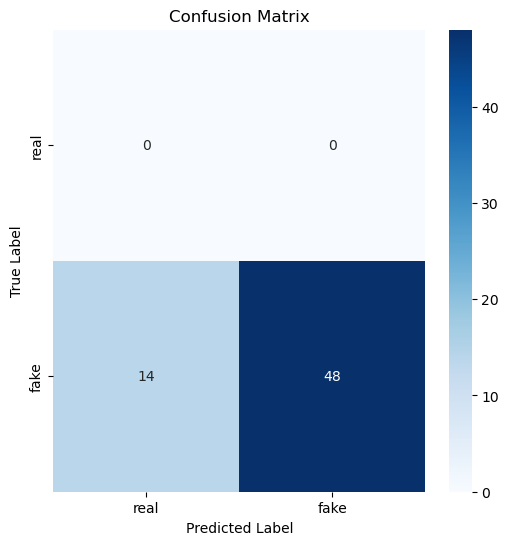

In [ ]:
CLASS_NAMES = ['real', 'fake']
metrics, cm = test(dm)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
cat, confidence, _ = predict_single_img('test_imgs/test_ai.jpg')
print(f"Detected {CLASS_NAMES[cat]} image")
print(f"Confidence score: {100 * confidence:.4f}%")

Detected real image
Confidence score: 99.6666%
